<a href="https://colab.research.google.com/github/josin29999/Brazillian-E-Commerce/blob/main/Beer_Data_Analysis_by_Evolent_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Schorschbräu Schorschbock stands as the reigning champion in the world of beer, claiming the title of the strongest beer available. In the year 2000, the beer scene saw its peak in terms of reviews, indicating a pivotal moment in the industry's history. When it comes to beer ratings, it's fascinating to note that flavor and taste take the top spots in importance, with aroma and smell following closely behind. Surprisingly, color, which is a significant visual aspect of beer, ranks third in terms of rating significance. If you're looking to recommend a beer to a friend who prefers a lighter taste, Blue Skies in Brugge or Smoked Cherrywood Stout could be excellent choices. Additionally, the Gose beer style receives the highest scores in written reviews, indicating its popularity among beer enthusiasts. Intriguingly, it appears that there is a low correlation between total reviews and overall review scores, suggesting that overall reviews might not be a reliable measure or that the reviewing process has room for improvement.

# Installing Library

In [1]:
!pip install wordcloud

# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

%matplotlib inline

from wordcloud import WordCloud
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

In [3]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Import Dataset

In [4]:
#https://drive.google.com/file/d/1e-kyoB97a5tnE7X4T4Es4FHi4g6Trefq/view
! gdown --id 1e-kyoB97a5tnE7X4T4Es4FHi4g6Trefq

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1e-kyoB97a5tnE7X4T4Es4FHi4g6Trefq
To: /content/BeerDataScienceProject.zip
100% 134M/134M [00:01<00:00, 68.2MB/s]


In [5]:
!unzip /content/BeerDataScienceProject.zip

Archive:  /content/BeerDataScienceProject.zip
  inflating: BeerDataScienceProject.csv  


In [6]:
df = pd.read_csv('/content/BeerDataScienceProject.csv', encoding='latin-1')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [8]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [9]:
# Grouping by beer_name
df_beer_name = df.groupby(["beer_name"], as_index = False).agg({"beer_ABV" : ["mean"]})

# Joining head columns
df_beer_name.columns = list(map(''.join,df_beer_name.columns.values))

# Sorting values & Top 3 Highest
df_beer_name.sort_values('beer_ABVmean', ascending=False).head(3)[['beer_name','beer_ABVmean']]

,beer_name,beer_ABVmean
14346,Schorschbräu Schorschbock 57%,57.70
14345,Schorschbräu Schorschbock 43%,43.00
14344,Schorschbräu Schorschbock 40%,39.44


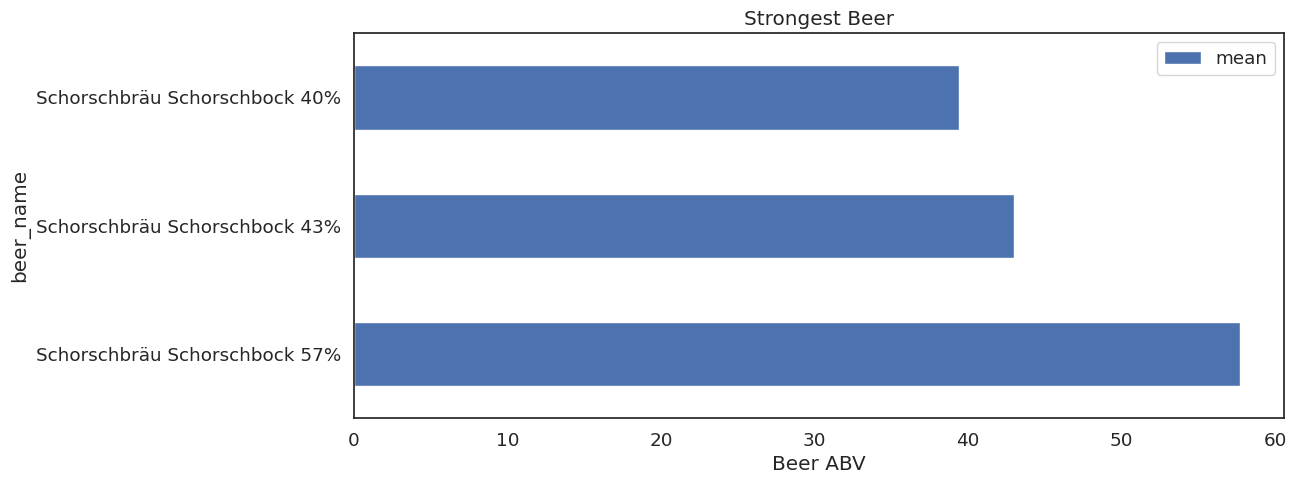

In [77]:
# Grouping & Plotting for Top 3 strongest beers
ax = df.query('beer_ABV >= 10') \
.groupby('beer_name')['beer_ABV'] \
.agg(['mean']) \
.sort_values('mean', ascending=False).head(3) \
.plot(kind='barh', figsize=(12, 5), title = 'Strongest Beer')
ax.set_xlabel('Beer ABV')
plt.show()

The strongest beer is Schorschbräu Schorschbock

In [11]:
# extracting Year
df['year'] = df.apply(lambda row: datetime.utcfromtimestamp(row.review_time).strftime("%Y"), axis=1)

In [12]:
df

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528865,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,3.5,orangemoustache,4.0,"A-pours a reddish amber that looks very nice,l...",1205212721,2008
528866,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.5,3.0,3.0,MisterStout,3.0,I don't really have anything special to say ab...,1203490783,2008
528867,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,4.0,4.5,4.0,meechum,4.5,Had this on tap at Vreny's Beirgarten A - Came...,1201320897,2008
528868,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,4.0,Dodo2step,4.5,"Purchased at Market Cross Pub in carlisle, PA....",1201215290,2008


In [13]:
df.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time',
       'year'],
      dtype='object')

<ipython-input-86-dc932087cb80>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_year['total'] = df_year.sum(axis=1)


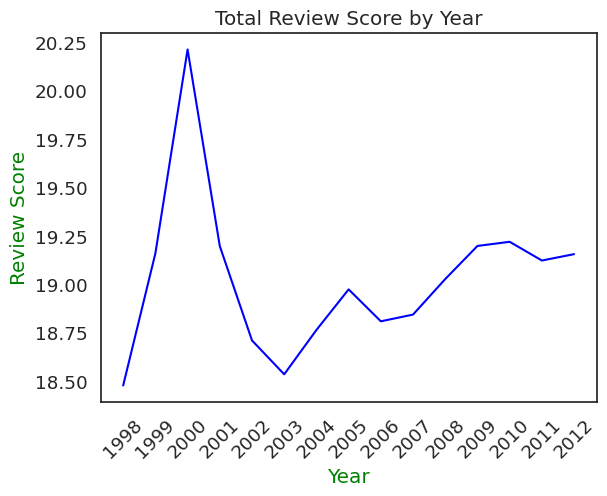

In [86]:
# Grouping by year
df_year = df.groupby(["year"], as_index = False).agg({'review_appearance' : ["mean"],
                                            'review_palette' : ["mean"],
                                            'review_overall' : ["mean"],
                                            'review_taste' : ["mean"],
                                            'review_aroma' : ["mean"]
})

# Joining head columns
df_year.columns = list(map(''.join,df_year.columns.values))

# make total review
df_year['total'] = df_year.sum(axis=1)

# plotting
year = df_year['year']
total = df_year['total']
line_chart1 = plt.plot(year, total, color='Blue')
plt.xlabel('Year',color="green")
plt.ylabel('Review Score',color="green")
plt.title('Total Review Score by Year')
plt.xticks(rotation=45)
plt.show()

* 2000th have highest review in beers scene

# Text Processing

In [16]:
# Grouping by beer_name
df_beer_name = df.groupby(["beer_name"], as_index = False).agg({"review_text" : ["first"]})

# Joining head columns
df_beer_name.columns = list(map(''.join,df_beer_name.columns.values))

In [16]:
df_beer_name

In [17]:
df_beer_name['review_txt'] = df_beer_name['review_textfirst'].astype(str).str.lower()
df_beer_name.head(3)

,beer_name,review_textfirst,review_txt
0,"""100"" Pale Ale",On-tap at Foundation served in a tall skinny p...,on-tap at foundation served in a tall skinny p...
1,"""33"" Export","I was not especially impressed with this beer,...","i was not especially impressed with this beer,..."
2,"""76"" Anniversary Ale",Perhaps the last growler of the last keg of 76...,perhaps the last growler of the last keg of 76...


In [18]:
regexp = RegexpTokenizer('\w+')

df_beer_name['review_token']=df_beer_name['review_txt'].apply(regexp.tokenize)
df_beer_name.head(3)

,beer_name,review_textfirst,review_txt,review_token
0,"""100"" Pale Ale",On-tap at Foundation served in a tall skinny p...,on-tap at foundation served in a tall skinny p...,"[on, tap, at, foundation, served, in, a, tall,..."
1,"""33"" Export","I was not especially impressed with this beer,...","i was not especially impressed with this beer,...","[i, was, not, especially, impressed, with, thi..."
2,"""76"" Anniversary Ale",Perhaps the last growler of the last keg of 76...,perhaps the last growler of the last keg of 76...,"[perhaps, the, last, growler, of, the, last, k..."


In [19]:
nltk.download('stopwords')

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
df_beer_name['review_token'] = df_beer_name['review_token'].apply(lambda x: [item for item in x if item not in stopwords])
df_beer_name['review_string'] = df_beer_name['review_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

all_words = ' '.join([word for word in df_beer_name['review_string']])

tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [21]:
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'beer': 21190, 'head': 16396, 'light': 13326, 'taste': 11605, 'malt': 10760, 'nice': 10705, 'good': 10514, 'sweet': 9642, 'hops': 9597, 'like': 9093, ...})

In [22]:
df_beer_name['review_string_fdist'] = df_beer_name['review_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

In [23]:
wordnet_lem = WordNetLemmatizer()

In [24]:
df_beer_name['review_string_lem'] = df_beer_name['review_string_fdist'].apply(wordnet_lem.lemmatize)

# check if the columns are equal
df_beer_name['is_equal']= (df_beer_name['review_string_fdist']==df_beer_name['review_string_lem'])

# show level count
df_beer_name.is_equal.value_counts()

all_words_lem = ' '.join([word for word in df_beer_name['review_string_lem']])

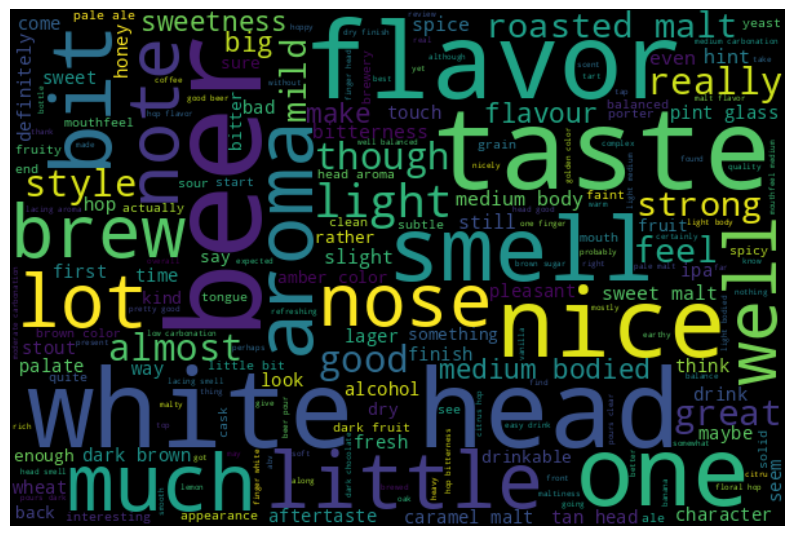

In [25]:
wordcloud = WordCloud(width=600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

Based on rating Flavor and taste have highest number, following of smell and aroma, than white which is colour is 3rd.

In [26]:
df_beer_name['word_count'] = df_beer_name['review_txt'].apply(lambda x: len(str(x).split(" ")))
df_beer_name[['review_txt','word_count']].head()

,review_txt,word_count
0,on-tap at foundation served in a tall skinny p...,63
1,"i was not especially impressed with this beer,...",96
2,perhaps the last growler of the last keg of 76...,137
3,a special version of bootlegger's anniversary ...,147
4,had on 11/19 at the ct location a: this beer p...,114


In [27]:
df_beer_name['word_count'].max()

762

In [48]:
# Count number of light word in each review
word_to_count = "light"
df_beer_name['light'] = df_beer_name['review_txt'].str.count(word_to_count.lower())

# Count number of taste word in each review
word_to_count = "taste"
df_beer_name['taste'] = df_beer_name['review_txt'].str.count(word_to_count.lower())

# sum number of taste word & number of light word
df_beer_name['light_taste'] = df_beer_name['light'] + df_beer_name['taste']

# the highest number of taset and light word is 17 word
df_beer_name.loc[df_beer_name['light_taste'] == 17]

,beer_name,review_textfirst,review_txt,review_token,review_string,review_string_fdist,review_string_lem,is_equal,word_count,light,taste,light_taste
2624,Blue Skies In Brugge,"On tap at the brewhouse in Framingham, MA. Lig...","on tap at the brewhouse in framingham, ma. lig...","[tap, brewhouse, framingham, light, fizzy, hea...",tap brewhouse framingham light fizzy head touc...,tap brewhouse framingham light fizzy head touc...,tap brewhouse framingham light fizzy head touc...,True,163,14,3,17
14981,Smoked Cherrywood Stout (ReplicAle 2011),On tap at the Pub. A- Pours a deep darker brow...,on tap at the pub. a- pours a deep darker brow...,"[tap, pub, pours, deep, darker, brown, light, ...",tap pub pours deep darker brown light amber hi...,tap pub pours deep darker brown light amber hi...,tap pub pours deep darker brown light amber hi...,True,320,15,2,17


i will recommend my friend **Blue Skies in Brugge or Smoked Cherrywood Stout** because their most have review **light taste** as beer

In [110]:
# Count number of light word in each review
word_to_count = "white"
df_beer_name['white'] = df_beer_name['review_txt'].str.count(word_to_count.lower())


# Count number of light word in each review
word_to_count = "flavor"
df_beer_name['flavor'] = df_beer_name['review_txt'].str.count(word_to_count.lower())


# Count number of light word in each review
word_to_count = "well"
df_beer_name['well'] = df_beer_name['review_txt'].str.count(word_to_count.lower())


# Count number of light word in each review
word_to_count = "aroma"
df_beer_name['aroma'] = df_beer_name['review_txt'].str.count(word_to_count.lower())

# Count number of light word in each review
word_to_count = "nice"
df_beer_name['nice'] = df_beer_name['review_txt'].str.count(word_to_count.lower())

# Grouping review_overall
df_bn2 = df.groupby(["beer_name"], as_index = False).agg({"beer_style" : ["first"],
                                                          "review_overall": ["mean"]})

# Joining head columns
df_bn2.columns = list(map(''.join,df_bn2.columns.values))

# merging df_beer_name & df_bn2
df_bn3 = df_bn2.merge(df_beer_name, how='left', on='beer_name')


# grouping by beer_style
df_bn4 = df_bn3.groupby(["beer_stylefirst"], as_index = False).agg({"review_overallmean" : ["mean"],
                                                           'white': ['mean'],
                                                           'flavor': ['mean'],
                                                           'well': ['mean'],
                                                           'aroma': ['mean'],
                                                           'nice': ['mean']})

# Joining head columns
df_bn4.columns = list(map(''.join,df_bn4.columns.values))

# sum of 5 word most important of written review
df_bn4['total_review'] = df_bn4['whitemean'] + df_bn4['flavormean'] + df_bn4['wellmean'] + df_bn4['aromamean'] + df_bn4['whitemean']

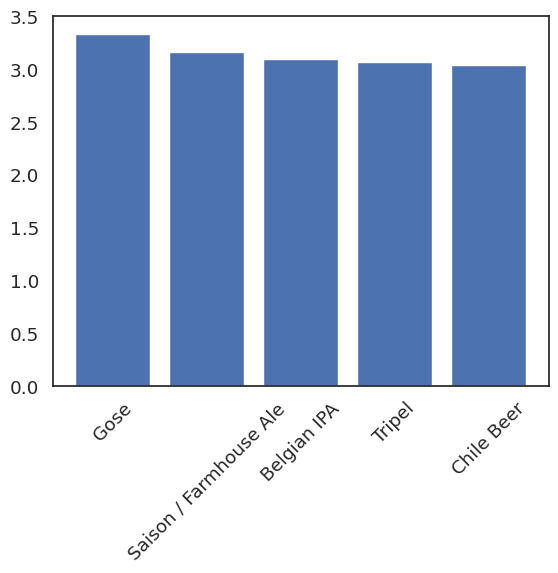

In [111]:
df_bn5 = df_bn4.sort_values('total_review', ascending=False)[['beer_stylefirst','total_review']].head(5)

x = df_bn5['beer_stylefirst']
y = df_bn5['total_review']
plt.bar(x, y)
plt.xticks(rotation=45)
plt.show()

based review written **Gose** have highest score written reivew

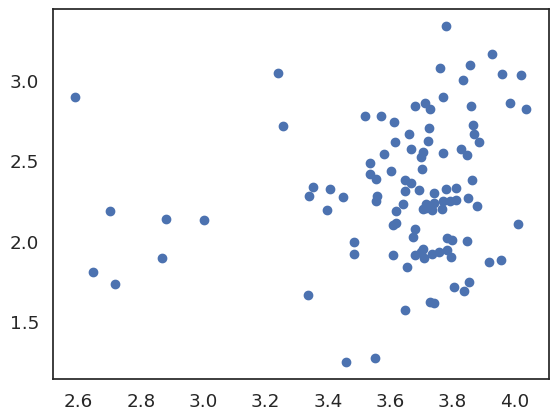

In [112]:
# Scatter plot
x = df_bn4['review_overallmeanmean']
y = df_bn4['total_review']
plt.scatter(x, y)
plt.show()

In [113]:
# number of correlation
corr = df_bn4.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-113-25d46897665e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_bn4.corr()
<ipython-input-113-25d46897665e>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,review_overallmeanmean,whitemean,flavormean,wellmean,aromamean,nicemean,total_review
review_overallmeanmean,1.00,-0.18,0.31,0.41,0.41,0.70,0.18
whitemean,-0.18,1.00,-0.14,-0.12,-0.16,-0.20,0.78
flavormean,0.31,-0.14,1.00,0.14,0.21,0.27,0.42
wellmean,0.41,-0.12,0.14,1.00,-0.00,0.15,0.21
aromamean,0.41,-0.16,0.21,-0.00,1.00,0.42,0.19
nicemean,0.70,-0.20,0.27,0.15,0.42,1.00,0.07
total_review,0.18,0.78,0.42,0.21,0.19,0.07,1.00


Total review & review overall have low correlation, that is mean review overall doesn't have correlation or the processing is bad